In [2]:
pip install -U ipykernel

  Using cached ipykernel-6.22.0-py3-none-any.whl (149 kB)
  Using cached comm-0.1.3-py3-none-any.whl (6.6 kB)

  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.9.1
    Uninstalling ipykernel-6.9.1:
      Successfully uninstalled ipykernel-6.9.1


In [12]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [39]:
import plotly.express as px

In [13]:
df = pd.read_parquet('train_mfti.parquet', engine='pyarrow')

In [14]:
data = pd.read_parquet('test_public_mfti.parquet', engine='pyarrow')

In [15]:
features = ['click_contacts',	'click_favorite',	'click_phone',	'click_response', 'preview_click_phone',	'preview_click_response']
df['Good'] = df.apply(lambda row:'Good' if row['event_type'] in features else 'Bad', axis=1)

In [16]:
df['Register'] = df.apply(lambda row:'не зарегистрирован' if row['user_id'] == None else 'зарегистрирован', axis=1)
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['time'] = df['event_timestamp'].dt.time
df['hour'] = df['event_timestamp'].dt.hour

In [20]:
df['date+hours']=df['event_timestamp'].dt.strftime('%d-%m-%Y %H')

In [21]:
df.head()

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour,date+hours
0,2022-08-01,2022-08-01 03:03:46,129850,97990f1a021d4be19aa3f955b7eacab4,951f53de61764ea0b51317200a0dbbfc,show_vacancy,Bad,зарегистрирован,03:03:46,3,01-08-2022 03
1,2022-08-01,2022-08-01 18:07:35,108347,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,18:07:35,18,01-08-2022 18
2,2022-08-01,2022-08-01 17:58:15,109069,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,17:58:15,17,01-08-2022 17
3,2022-08-01,2022-08-01 17:58:42,171425,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,17:58:42,17,01-08-2022 17
4,2022-08-01,2022-08-01 17:28:49,252384,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,17:28:49,17,01-08-2022 17


# Рассмотрим вакансии 3х cookie_id

### 1. Cookie_id, у которого максимальное взаимодействие с заявками

Для этого найдем Cookie_id, которое максимально часто встречается в датасете

In [70]:
df['cookie_id'].value_counts()

924398d361a0454c8c30845c2b4c5747    4898
7d8cc5a0fef44378a2d90a237cda288e    3343
5934d5b8a0b348829d8efabe69c733eb    3315
b7dd2f20fdd6472ab62f8d86a739cd5d    3312
353b56c4fa6447d0ba0f08b42d86e51f    2795
                                    ... 
1b4240c448df47f29e00ef38b8215ea2       5
99c776f7ff1d4e73919342365bc0de0a       5
f84c882a92d74646bfc6eb4447b11d3c       5
9b86c05707bc43d19dfaf60563627c2d       5
694ea921f0d14d56853bf9856866110d       5
Name: cookie_id, Length: 330180, dtype: int64

In [69]:
cookie_max=df['cookie_id'].value_counts().index[0]
cookie_max

'924398d361a0454c8c30845c2b4c5747'

Далее рассмотрим датасет с этим cookie_id

In [24]:
df_0=df[df['cookie_id']=='924398d361a0454c8c30845c2b4c5747']
df_0=df_0.sort_values(['event_date','time'])
df_0.head(20)

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour,date+hours
1024598,2022-08-06,2022-08-06 08:33:31,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,show_vacancy,Bad,зарегистрирован,08:33:31,8,06-08-2022 08
1064575,2022-08-06,2022-08-06 08:33:31,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_vacancy,Bad,зарегистрирован,08:33:31,8,06-08-2022 08
12270295,2022-08-06,2022-08-06 08:33:34,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,click_favorite,Good,зарегистрирован,08:33:34,8,06-08-2022 08
12239122,2022-08-06,2022-08-06 08:33:44,111109,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:44,8,06-08-2022 08
12239401,2022-08-06,2022-08-06 08:33:50,118895,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:50,8,06-08-2022 08
12240358,2022-08-06,2022-08-06 08:33:54,131100,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:54,8,06-08-2022 08
12240353,2022-08-06,2022-08-06 08:33:58,131041,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:58,8,06-08-2022 08
12241456,2022-08-06,2022-08-06 08:34:02,152505,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:34:02,8,06-08-2022 08
12239494,2022-08-06,2022-08-06 08:34:09,119239,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:34:09,8,06-08-2022 08
12239438,2022-08-06,2022-08-06 08:34:12,118950,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:34:12,8,06-08-2022 08


Посмотрим распределение по времени взаимодействий на графике

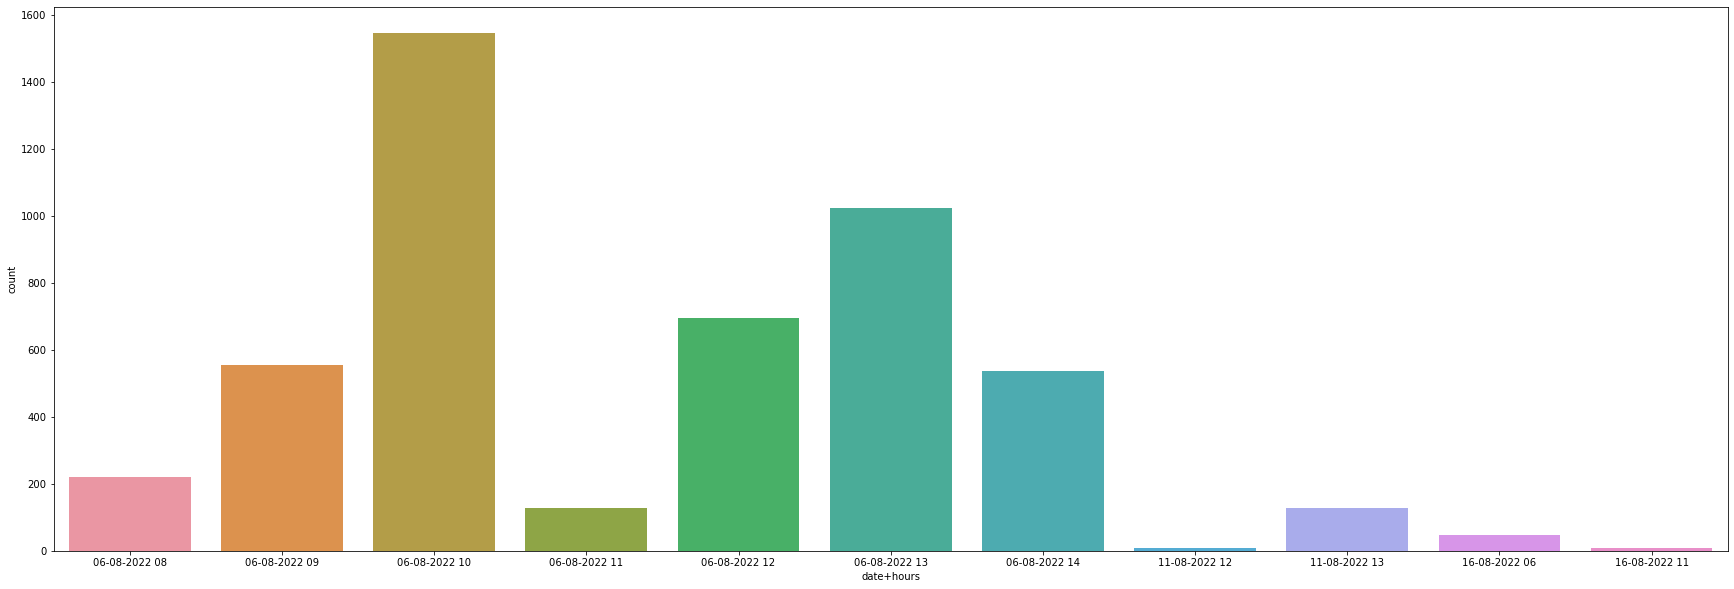

In [30]:
plt.figure(figsize=(30,10))
sns.countplot(data=df_0, x="date+hours")
plt.show()

За один час 06.08 было просмотрено 1500 вакансий.Рассмотрим количество именно типов взаимодействий

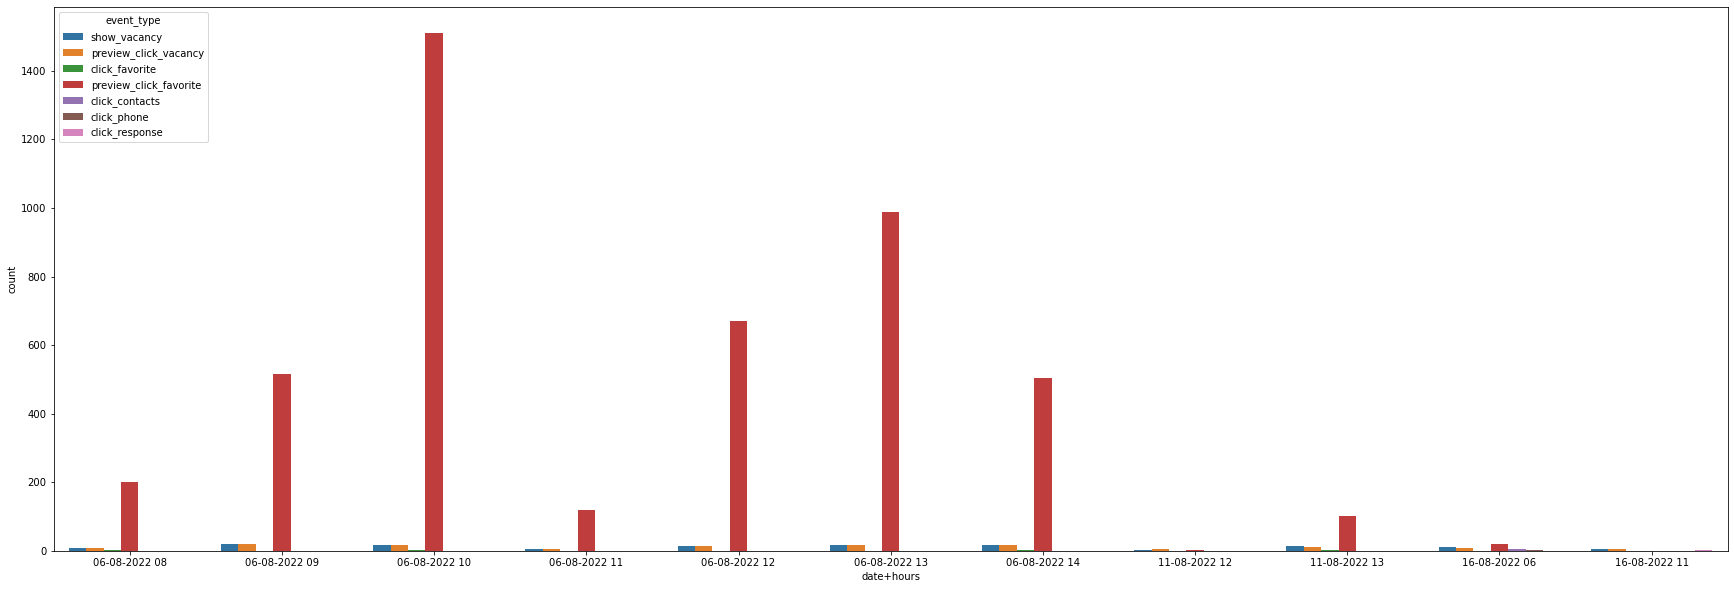

In [42]:
plt.figure(figsize=(30,10))
sns.countplot(data=df_0, x="date+hours", hue="event_type")
plt.show()

preview_click_favorite - добавление вакансии в избраное с карточки вакансии. Для того,чтобы добавить карточку в избранное,надо в нее зайти. Однако здесь избранными стали все вакансии. Ситуация непонятная.
Посмотрим график без этого типа заявок.

In [45]:
df_01=df_0[df_0['event_type']!='preview_click_favorite']

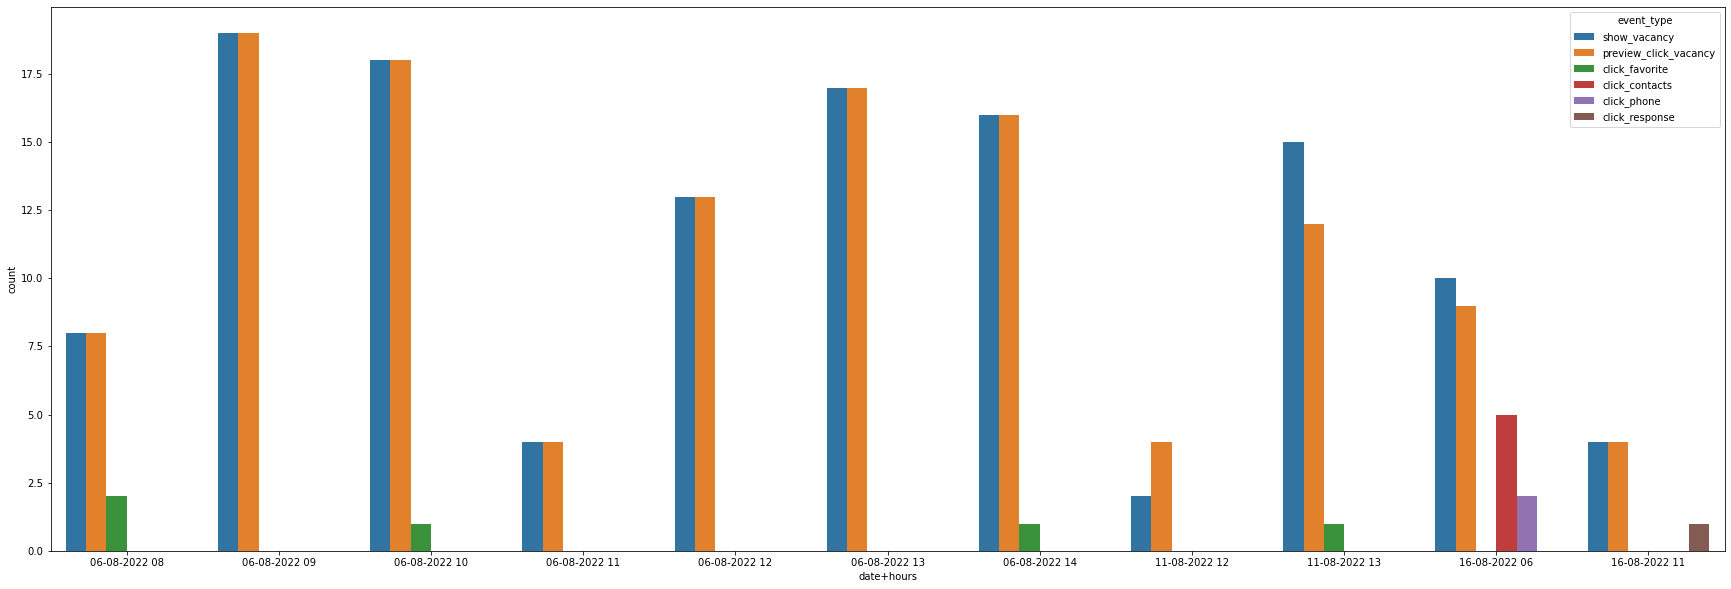

In [46]:
plt.figure(figsize=(30,10))
sns.countplot(data=df_01, x="date+hours", hue="event_type")
plt.show()

### 2. Cookie_id, у которого максимальное количество хороших взаимодействий с заявками

In [71]:
df[df['Good']=='Good']['cookie_id'].value_counts()

3c41b51c28cc4eecabc3c5ebd7fd3a8b    1857
b7dd2f20fdd6472ab62f8d86a739cd5d    1252
728c61d1db294cb59e6032a65706b964    1206
94f2efb02a214ef0bd310fcd53a7d98c    1023
f8e12eeea04f48f9abc4922037ef198a     633
                                    ... 
f55a8cfd030640e5a3cbe63b753e9774       1
8454012d8f664a508ea35343a1124de5       1
3060eb5bb719469982d17a51592c982b       1
d184a72975bd447cb0b544b83c3b68c4       1
eb605350db95434e88d424cba513b2dd       1
Name: cookie_id, Length: 190445, dtype: int64

In [72]:
cookie_max_good=df[df['Good']=='Good']['cookie_id'].value_counts().index[0]
cookie_max_good

'3c41b51c28cc4eecabc3c5ebd7fd3a8b'

In [73]:
df_1=df[df['cookie_id']==cookie_max_good]
df_1=df_1.sort_values(['event_date','time'])
df_1.head(20)

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour,date+hours
11134589,2022-08-10,2022-08-10 07:20:07,133358,3c41b51c28cc4eecabc3c5ebd7fd3a8b,None,click_contacts,Good,не зарегистрирован,07:20:07,7,10-08-2022 07
11252178,2022-08-10,2022-08-10 07:27:40,160553,3c41b51c28cc4eecabc3c5ebd7fd3a8b,None,click_contacts,Good,не зарегистрирован,07:27:40,7,10-08-2022 07
11066218,2022-08-10,2022-08-10 07:29:46,211330,3c41b51c28cc4eecabc3c5ebd7fd3a8b,None,click_contacts,Good,не зарегистрирован,07:29:46,7,10-08-2022 07
11252459,2022-08-10,2022-08-10 07:40:12,168662,3c41b51c28cc4eecabc3c5ebd7fd3a8b,None,click_contacts,Good,не зарегистрирован,07:40:12,7,10-08-2022 07
11066289,2022-08-10,2022-08-10 07:57:11,110008,3c41b51c28cc4eecabc3c5ebd7fd3a8b,None,click_contacts,Good,не зарегистрирован,07:57:11,7,10-08-2022 07
11065864,2022-08-10,2022-08-10 08:59:28,108108,3c41b51c28cc4eecabc3c5ebd7fd3a8b,None,click_contacts,Good,не зарегистрирован,08:59:28,8,10-08-2022 08
11065865,2022-08-10,2022-08-10 09:02:35,108108,3c41b51c28cc4eecabc3c5ebd7fd3a8b,None,click_contacts,Good,не зарегистрирован,09:02:35,9,10-08-2022 09
11134068,2022-08-10,2022-08-10 09:03:16,108681,3c41b51c28cc4eecabc3c5ebd7fd3a8b,None,click_contacts,Good,не зарегистрирован,09:03:16,9,10-08-2022 09
11066670,2022-08-10,2022-08-10 09:29:10,181782,3c41b51c28cc4eecabc3c5ebd7fd3a8b,None,click_contacts,Good,не зарегистрирован,09:29:10,9,10-08-2022 09
11134526,2022-08-10,2022-08-10 09:40:50,131796,3c41b51c28cc4eecabc3c5ebd7fd3a8b,None,click_contacts,Good,не зарегистрирован,09:40:50,9,10-08-2022 09


click_contacts - клик на контакты со страницы вакансии. Ситуация странная. Получается,если был клик по ссылке,это не считается?

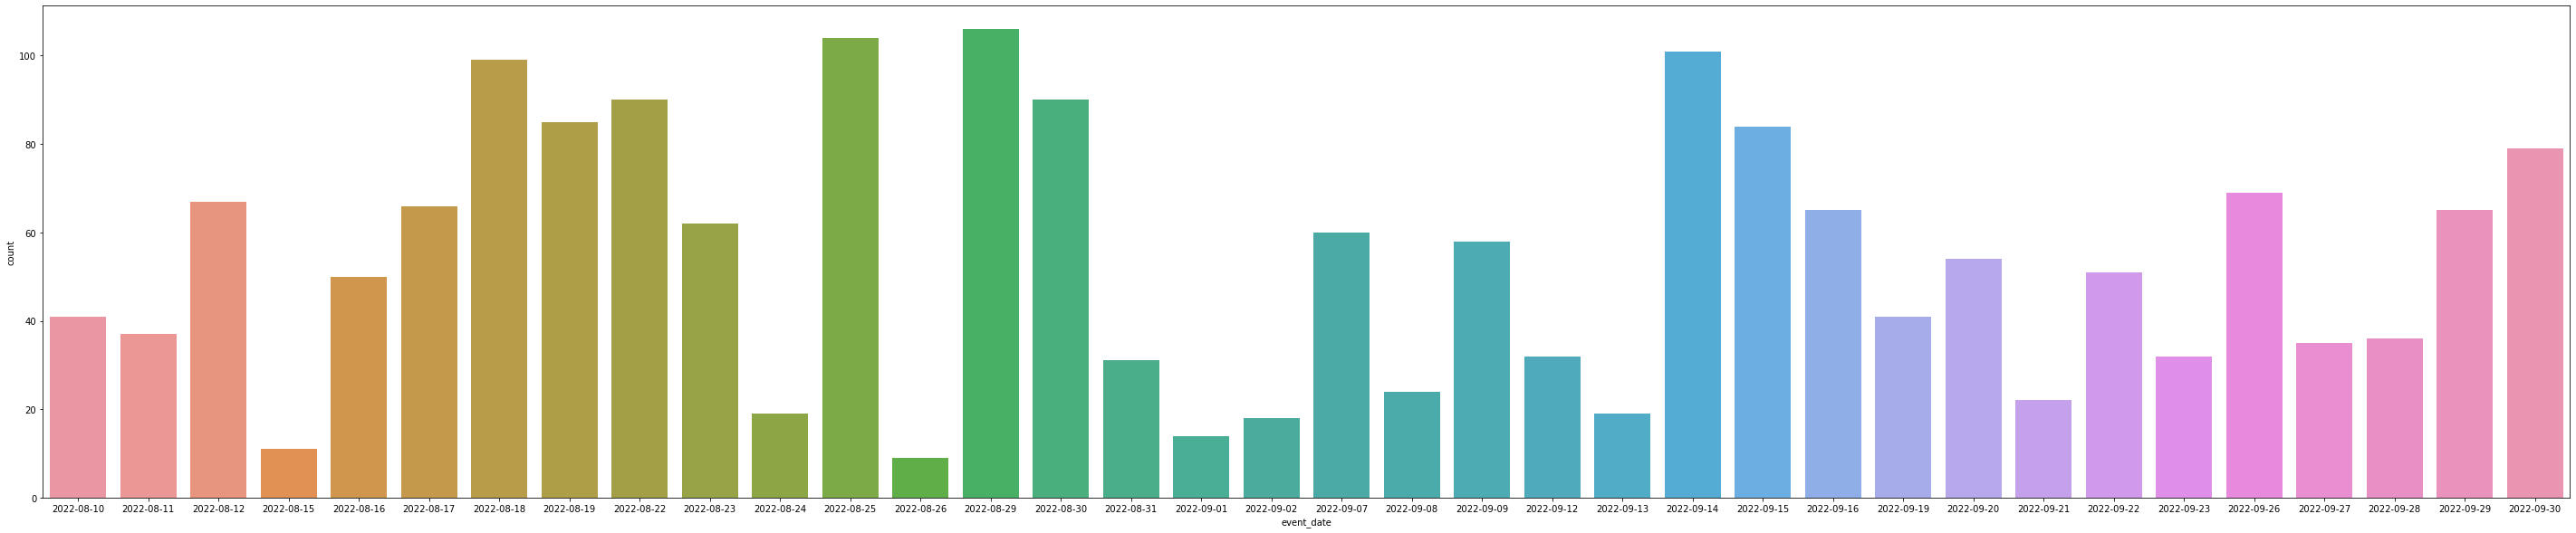

In [87]:
plt.figure(figsize=(50,10))
sns.countplot(data=df_1, x="event_date")
plt.show()

### 3. Cookie_id, у которого максимальное количество плохих взаимодействий с заявками

In [89]:
df[df['Good']=='Bad']['cookie_id'].value_counts()

924398d361a0454c8c30845c2b4c5747    4885
7d8cc5a0fef44378a2d90a237cda288e    3319
5934d5b8a0b348829d8efabe69c733eb    3267
353b56c4fa6447d0ba0f08b42d86e51f    2700
6b3281f474314f96b75a7d1a06f09eed    2455
                                    ... 
452db7511c0a4ad6959a346a854ec1d3       5
26ac09bbec544298acce25b1dc9a9b2a       4
31d796f9c2a64f109552dd2f8713196a       4
7c0cf08b601541efb790cdf8fb1e36e0       4
3d9b47e9a47c4071800e61f6962f9c03       4
Name: cookie_id, Length: 330180, dtype: int64

In [90]:
cookie_max_bad=df[df['Good']=='Bad']['cookie_id'].value_counts().index[0]
cookie_max_bad

'924398d361a0454c8c30845c2b4c5747'

In [108]:
df_3=df[df['cookie_id']==cookie_max_bad]
df_3=df_2.sort_values(['event_date','time'])
df_3.head(20)

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour,date+hours
1024598,2022-08-06,2022-08-06 08:33:31,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,show_vacancy,Bad,зарегистрирован,08:33:31,8,06-08-2022 08
1064575,2022-08-06,2022-08-06 08:33:31,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_vacancy,Bad,зарегистрирован,08:33:31,8,06-08-2022 08
12270295,2022-08-06,2022-08-06 08:33:34,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,click_favorite,Good,зарегистрирован,08:33:34,8,06-08-2022 08
12239122,2022-08-06,2022-08-06 08:33:44,111109,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:44,8,06-08-2022 08
12239401,2022-08-06,2022-08-06 08:33:50,118895,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:50,8,06-08-2022 08
12240358,2022-08-06,2022-08-06 08:33:54,131100,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:54,8,06-08-2022 08
12240353,2022-08-06,2022-08-06 08:33:58,131041,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:58,8,06-08-2022 08
12241456,2022-08-06,2022-08-06 08:34:02,152505,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:34:02,8,06-08-2022 08
12239494,2022-08-06,2022-08-06 08:34:09,119239,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:34:09,8,06-08-2022 08
12239438,2022-08-06,2022-08-06 08:34:12,118950,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:34:12,8,06-08-2022 08


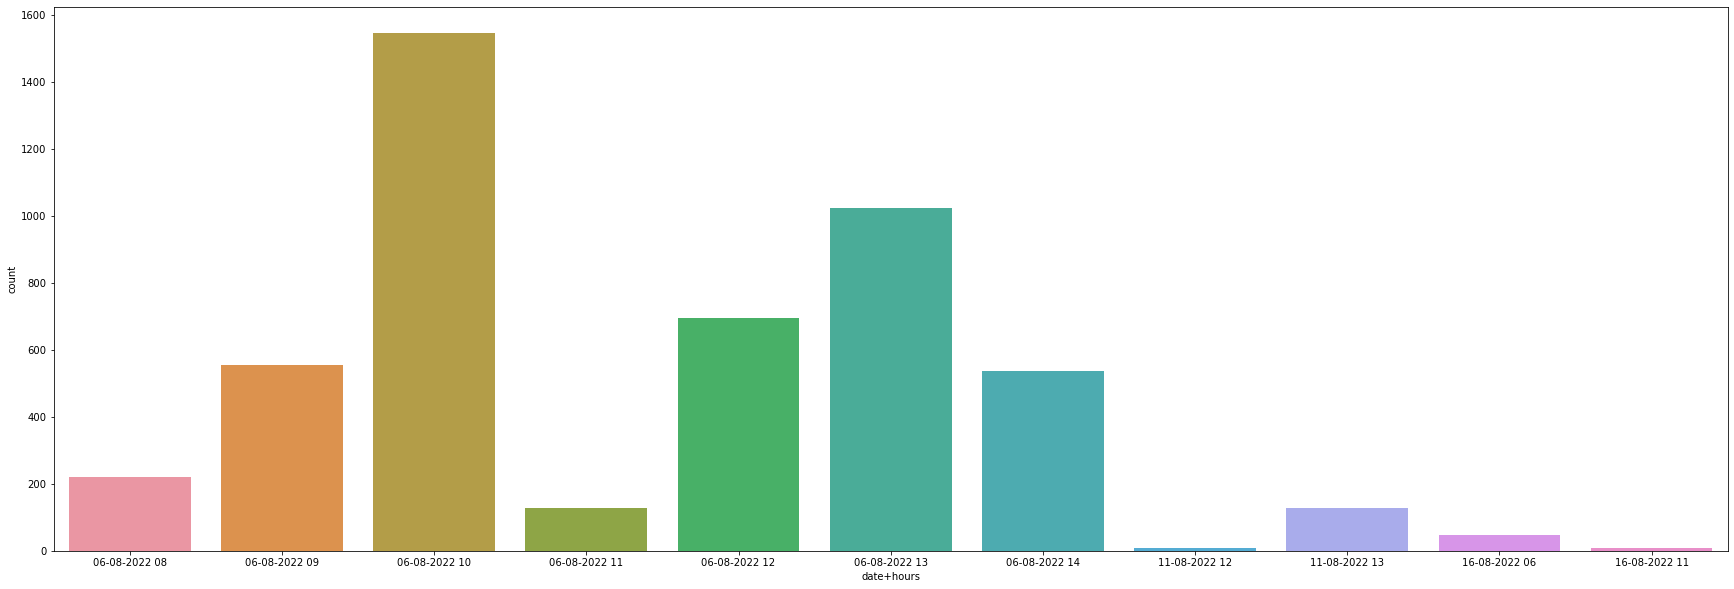

In [109]:
plt.figure(figsize=(30,10))
sns.countplot(data=df_3, x="date+hours")
plt.show()

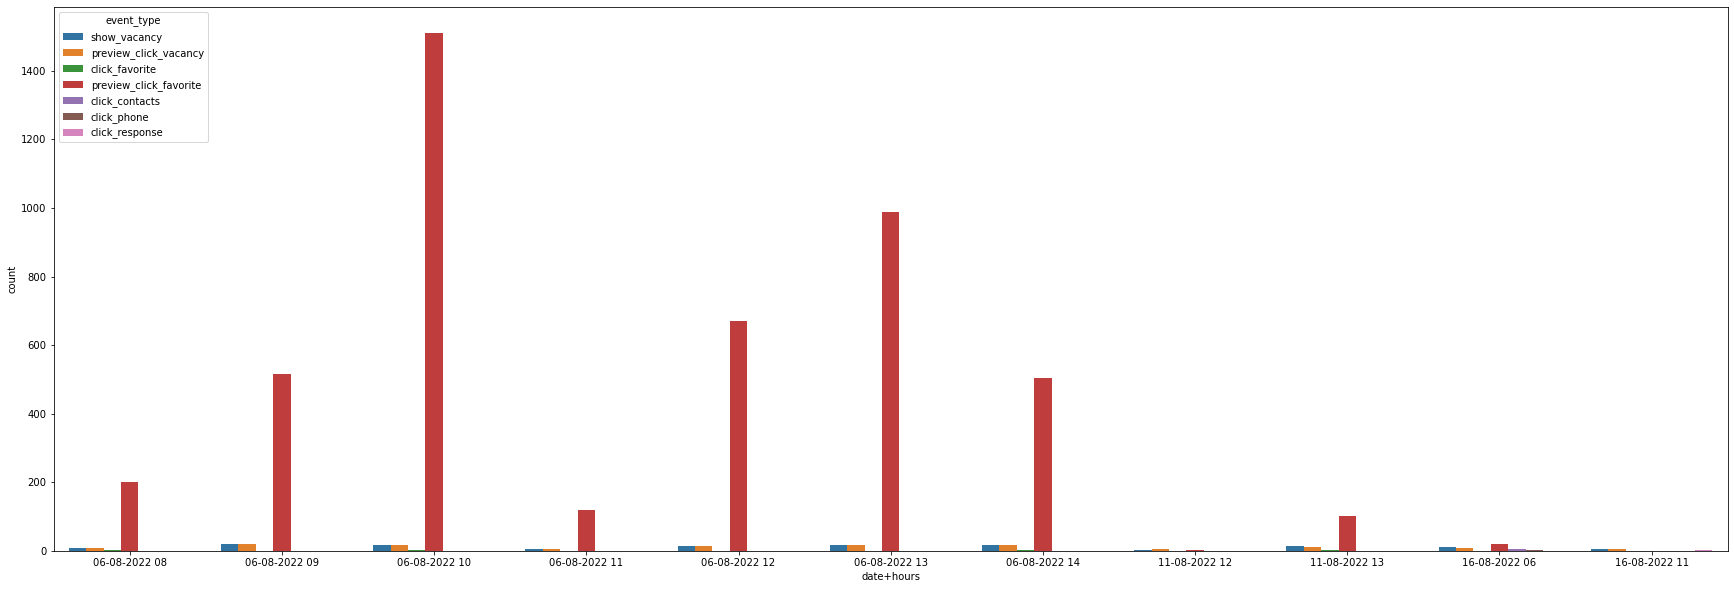

In [110]:
plt.figure(figsize=(30,10))
sns.countplot(data=df_3, x="date+hours", hue="event_type")
plt.show()

Это-тот же cookie, что и первый

# Посмотрим статистику по дням недели

In [104]:
df['weekday'] = df['event_timestamp'].dt.day_name()

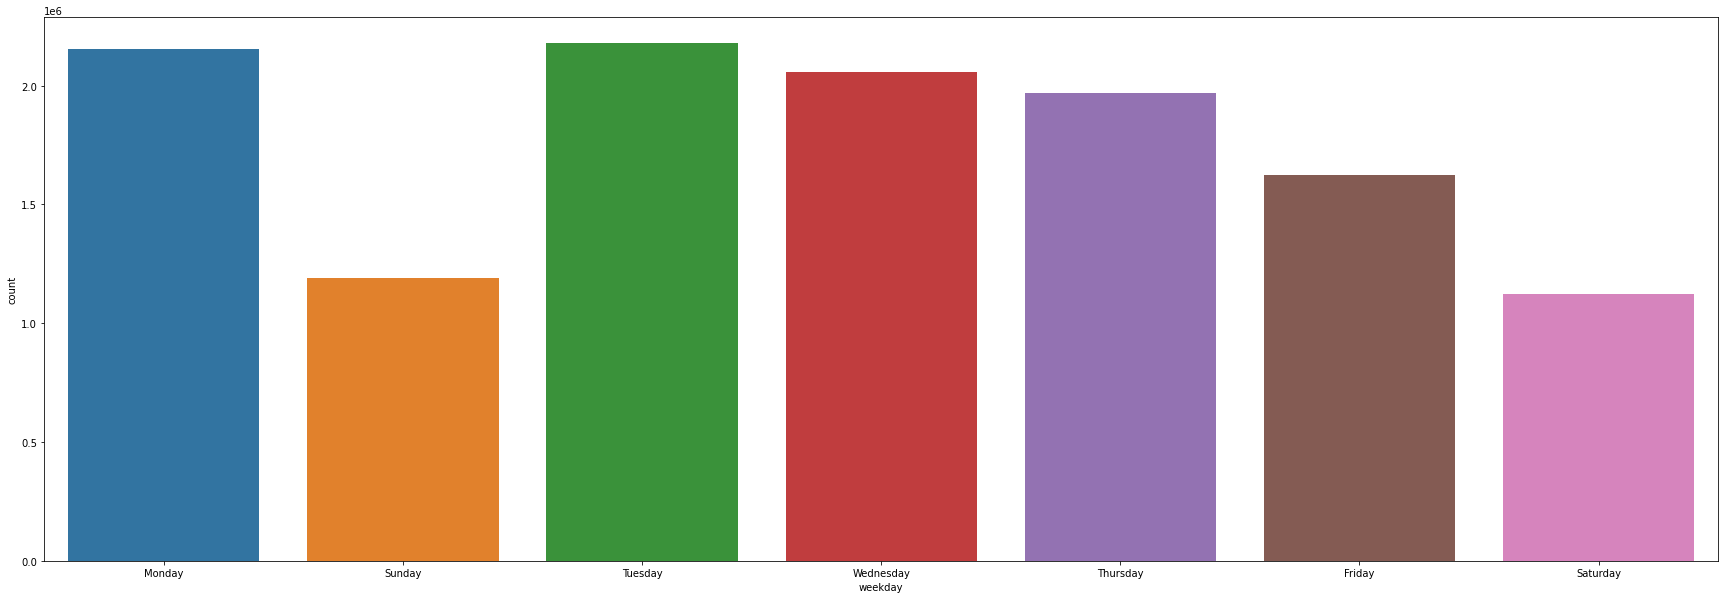

In [105]:
plt.figure(figsize=(30,10))
sns.countplot(data=df, x="weekday")
plt.show()

Чаще всего с заявками взаимодействуют в понедельник и среду

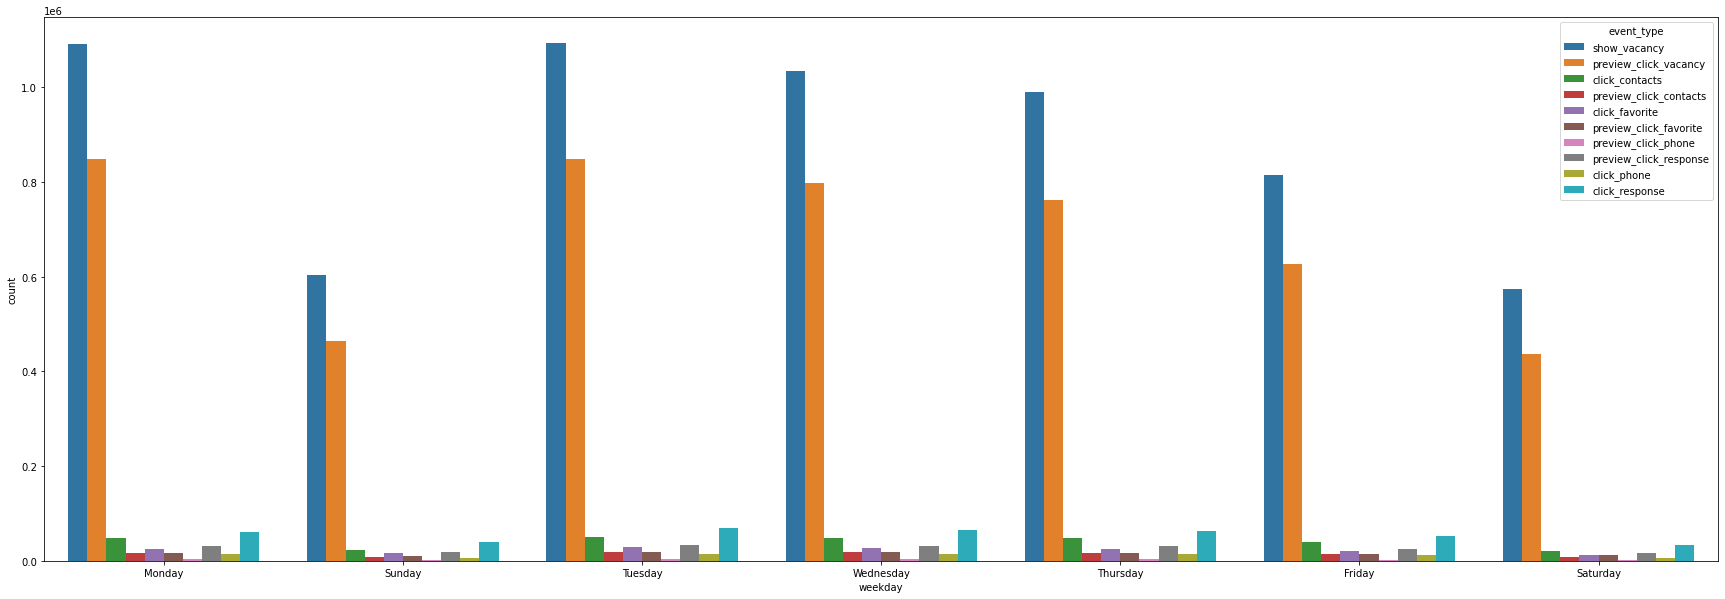

In [107]:
plt.figure(figsize=(30,10))
sns.countplot(data=df, x="weekday", hue="event_type")
plt.show()

In [113]:
df_4=df[(df['event_type']!='show_vacancy') & (df['event_type']!='preview_click_vacancy')]

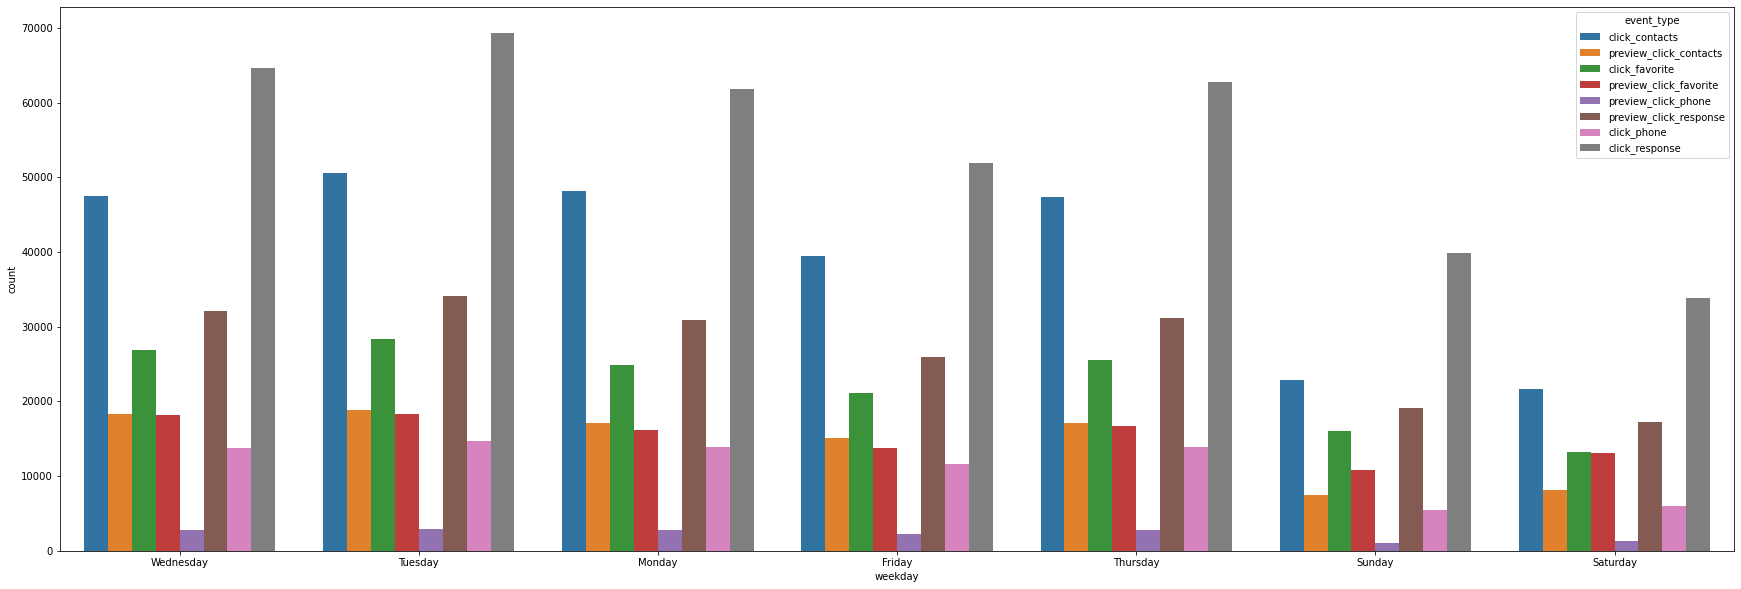

In [114]:
plt.figure(figsize=(30,10))
sns.countplot(data=df_4, x="weekday", hue="event_type")
plt.show()

# Рассмотрим вакансии 1го user_id

In [115]:
df['user_id'].value_counts()

4185734babb340cb84dcfa8241a9766d    4898
bc7fcaa0192b424a9dc5f4f590562d27    3343
27912d1089f0400fb89fe9e22e33010d    3341
c531d5f027be41829a3510df40a5957e    3312
d370749682b844a6b3c15f2244ffee0f    2795
                                    ... 
8439bf644b63495d8ac75c81260f4849       1
b11daca32e91421cbacfbd14ec0e7b2f       1
4cc4db0575dc4bf994a31407a29221c5       1
a76a3da4672f4d5c8033b806a283651d       1
66cfc101fb524101bca6ec941710024d       1
Name: user_id, Length: 209335, dtype: int64

In [116]:
cookie_max=df['user_id'].value_counts().index[0]
cookie_max
df_5=df[df['cookie_id']=='924398d361a0454c8c30845c2b4c5747']
df_5=df_5.sort_values(['event_date','time'])
df_5.head(20)

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour,date+hours,weekday
1024598,2022-08-06,2022-08-06 08:33:31,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,show_vacancy,Bad,зарегистрирован,08:33:31,8,06-08-2022 08,Saturday
1064575,2022-08-06,2022-08-06 08:33:31,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_vacancy,Bad,зарегистрирован,08:33:31,8,06-08-2022 08,Saturday
12270295,2022-08-06,2022-08-06 08:33:34,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,click_favorite,Good,зарегистрирован,08:33:34,8,06-08-2022 08,Saturday
12239122,2022-08-06,2022-08-06 08:33:44,111109,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:44,8,06-08-2022 08,Saturday
12239401,2022-08-06,2022-08-06 08:33:50,118895,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:50,8,06-08-2022 08,Saturday
12240358,2022-08-06,2022-08-06 08:33:54,131100,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:54,8,06-08-2022 08,Saturday
12240353,2022-08-06,2022-08-06 08:33:58,131041,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:58,8,06-08-2022 08,Saturday
12241456,2022-08-06,2022-08-06 08:34:02,152505,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:34:02,8,06-08-2022 08,Saturday
12239494,2022-08-06,2022-08-06 08:34:09,119239,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:34:09,8,06-08-2022 08,Saturday
12239438,2022-08-06,2022-08-06 08:34:12,118950,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:34:12,8,06-08-2022 08,Saturday


User_id и Cookie_id совпадают